# RST control of a hydropower dam
The system is given by the difference equation
$$ x(t) = x(t-1) + u(t) - v(t), $$
where $x$ is the deviation of the water level from a reference level, $u$ is the change in the flow through the dam gates. A positive value of $u$ corresponds to less flow through the gates, relative to an operating point. The flow $v$ corresponds to changes in the flow in (from river) or out (through power plant). 
The pulse transfer function of the dam is $$H(z) = \frac{z}{z-1}.$$

The desired closed-loop system from the command signal to the output $x$ is
$$ G_c(z) = \frac{B(z)}{A(z)} = \frac{0.3z}{z-0.7} $$
and we are considering an observer polynomial with a single pole $z-a$. 

The Diophantine equation becomes
$$ (z-1)R(z) + zS(z) = (z-0.7)(z-a) $$
from which we see that the 

In [1]:
using Interact
using ControlSystems
using Gadfly

    write(Base.IO, ForwardDiff.Partials) at /home/kjartan/.julia/v0.4/ForwardDiff/src/partials.jl:57
is ambiguous with: 
    write(Base.Base64.Base64EncodePipe, AbstractArray{UInt8, 1}) at base64.jl:89.
To fix, define 
    write(Base.Base64.Base64EncodePipe, ForwardDiff.Partials{N<:Any, UInt8})
before the new definition.
    +(AbstractArray, DataArrays.DataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:139.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:139.
To fix, define 
    +(Woodbur

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(1.0, nactions=1),"ωn",1.0,"1.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.02"=>0.02,"0.04"=>0.04,"0.06"=>0.06,"0.08"=>0.08,"0.1"=>0.1,"0.12"=>0.12,"0.14"=>0.14,"0.16"=>0.16,"0.18"=>0.18,"0.2"=>0.2,"0.22"=>0.22,"0.24"=>0.24,"0.26"=>0.26,"0.28"=>0.28,"0.3"=>0.3,"0.32"=>0.32,"0.34"=>0.34,"0.36"=>0.36,"0.38"=>0.38,"0.4"=>0.4,"0.42"=>0.42,"0.44"=>0.44,"0.46"=>0.46,"0.48"=>0.48,"0.5"=>0.5,"0.52"=>0.52,"0.54"=>0.54,"0.56"=>0.56,"0.58"=>0.58,"0.6"=>0.6,"0.62"=>0.62,"0.64"=>0.64,"0.66"=>0.66,"0.68"=>0.68,"0.7"=>0.7,"0.72"=>0.72,"0.74"=>0.74,"0.76"=>0.76,"0.78"=>0.78,"0.8"=>0.8,"0.82"=>0.82,"0.84"=>0.84,"0.86"=>0.86,"0.88"=>0.88,"0.9"=>0.9,"0.92"=>0.92,"0.94"=>0.94,"0.96"=>0.96,"0.98"=>0.98,"1.0"=>1.0,"1.02"=>1.02,"1.04"=>1.04,"1.06"=>1.06,"1.08"=>1.08,"1.1"=>1.1,"1.12"=>1.12,"1.14"=>1.14,"1.16"=>1.16,"1.18"=>1.18,"1.2"=>1.2,"1.22"=>1.22,"1.24"=>1.24,"1.26"=>1.26,"1.28"=>1.28,"1.3"=>1.3,"1.32"=>1.32,"1.34"=>1.34,"1.36"=>1.36,"1.38"=>1.38,"1.4"=>1.4,"1.42"=>1.42,"1.44"=>1.44,"1.46"=>1.46,"1.48"=>1.48,"1.5"=>1.5,"1.52"=>1.52,"1.54"=>1.54,"1.56"=>1.56,"1.58"=>1.58,"1.6"=>1.6,"1.62"=>1.62,"1.64"=>1.64,"1.66"=>1.66,"1.68"=>1.68,"1.7"=>1.7,"1.72"=>1.72,"1.74"=>1.74,"1.76"=>1.76,"1.78"=>1.78,"1.8"=>1.8,"1.82"=>1.82,"1.84"=>1.84,"1.86"=>1.86,"1.88"=>1.88,"1.9"=>1.9,"1.92"=>1.92,"1.94"=>1.94,"1.96"=>1.96,"1.98"=>1.98,"2.0"=>2.0),Dict(1.2=>"1.2",0.54=>"0.54",1.46=>"1.46",2.0=>"2.0",1.68=>"1.68",0.86=>"0.86",1.5=>"1.5",1.06=>"1.06",1.04=>"1.04",1.4=>"1.4",1.82=>"1.82",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",1.24=>"1.24",1.32=>"1.32",1.36=>"1.36",0.06=>"0.06",0.48=>"0.48",1.42=>"1.42",1.62=>"1.62",1.44=>"1.44",1.48=>"1.48",1.22=>"1.22",0.24=>"0.24",1.14=>"1.14",0.3=>"0.3",1.64=>"1.64",0.74=>"0.74",0.08=>"0.08",0.7=>"0.7",0.58=>"0.58",0.76=>"0.76",0.78=>"0.78",0.34=>"0.34",1.34=>"1.34",0.88=>"0.88",1.78=>"1.78",1.6=>"1.6",1.98=>"1.98",0.46=>"0.46",1.28=>"1.28",1.9=>"1.9",0.4=>"0.4",1.1=>"1.1",0.36=>"0.36",1.3=>"1.3",1.12=>"1.12",0.42=>"0.42",0.12=>"0.12",1.0=>"1.0",1.88=>"1.88",1.76=>"1.76",0.96=>"0.96",0.32=>"0.32",0.26=>"0.26",0.16=>"0.16",0.0=>"0.0",0.9=>"0.9",0.8=>"0.8",0.14=>"0.14",1.58=>"1.58",0.98=>"0.98",1.96=>"1.96",0.5=>"0.5",1.54=>"1.54",0.02=>"0.02",1.16=>"1.16",0.64=>"0.64",0.62=>"0.62",1.8=>"1.8",1.72=>"1.72",0.44=>"0.44",1.02=>"1.02",0.92=>"0.92",1.26=>"1.26",1.38=>"1.38",1.66=>"1.66",0.04=>"0.04",0.72=>"0.72",0.66=>"0.66",0.84=>"0.84",1.92=>"1.92",1.84=>"1.84",1.52=>"1.52",0.28=>"0.28",0.68=>"0.68",1.18=>"1.18",1.74=>"1.74",0.18=>"0.18",1.08=>"1.08",0.1=>"0.1",0.82=>"0.82",1.56=>"1.56",0.94=>"0.94",1.94=>"1.94",0.52=>"0.52",1.86=>"1.86",1.7=>"1.7",0.6=>"0.6")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"ζ",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0),Dict(0.6=>"0.6",0.3=>"0.3",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4",1.0=>"1.0")),Any[],Any[],true,"horizontal")

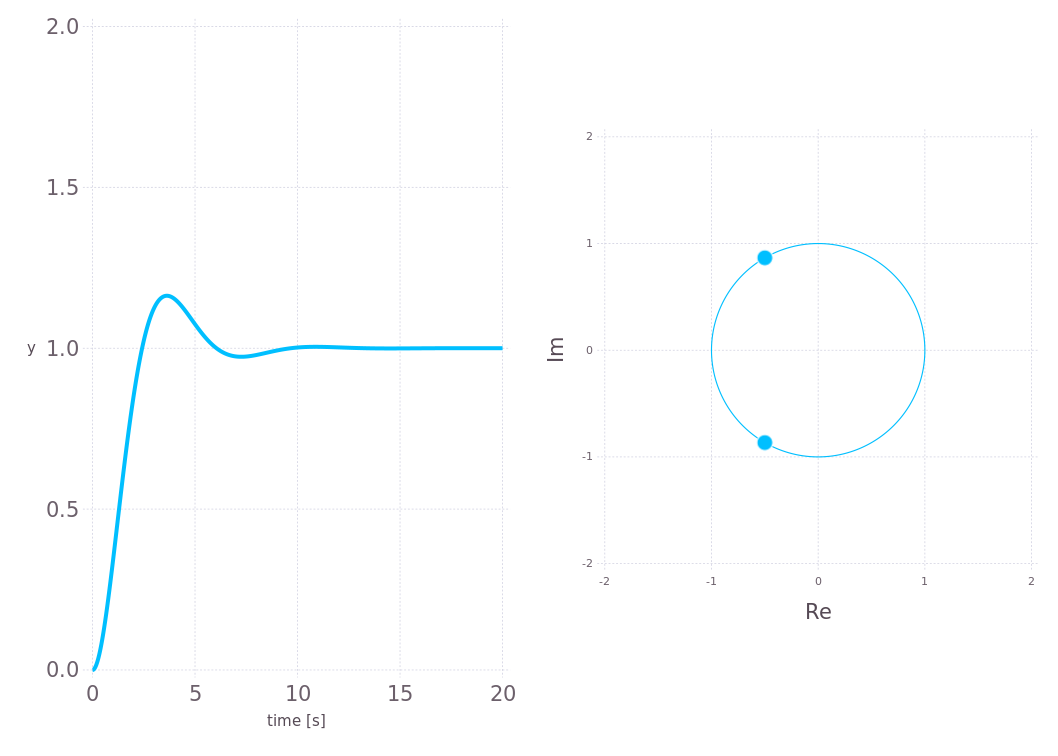

In [2]:
set_default_plot_size(28cm, 20cm)

N = 1200; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for ωn in 0:0.02:2, ζ in 0:0.1:1.0
    G = minreal(tf([ωn^2], [1.0, 2*ζ*ωn, ωn^2]));
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, Guide.xlabel("time [s]"), Guide.ylabel("y"), 
    Coord.cartesian(xmin=-0.1, xmax=20, ymin=0, ymax=2),
        style(line_width=3pt,  minor_label_font_size=16pt))
    pp = plot(layer(x = -ζ*ωn*[1, 1], y=sqrt(1 - ζ^2)*ωn*[1, -1], Geom.point, 
            style(default_point_size=6pt)), 
            layer(x=cos(linspace(0,2π,300)), y=sin(linspace(0,2π,300)), Geom.path),
                Guide.xlabel("Re"), Guide.ylabel("Im"), 
            Coord.cartesian(xmin=-2, xmax=2, ymin=-2, ymax=2, aspect_ratio=1),
            style( major_label_font_size=16pt))
    fig1 = hstack(stp, pp)

end